  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'reverse'}

  2x1 cell 数组

    {'normal' }
    {'rev

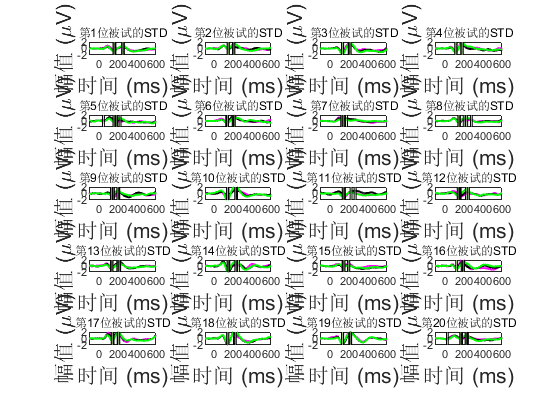

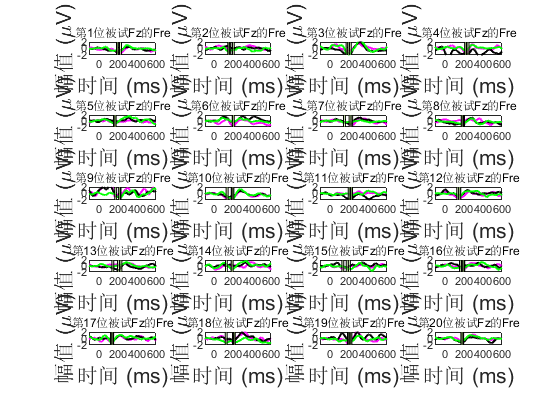

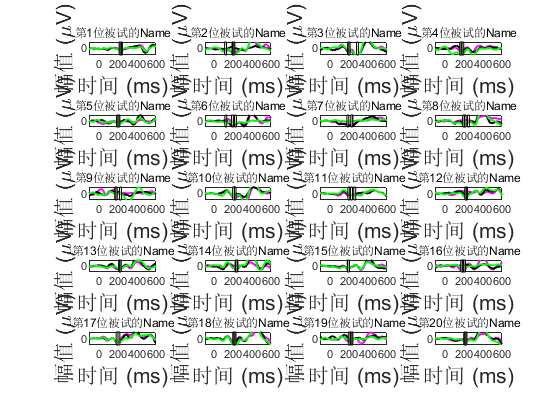

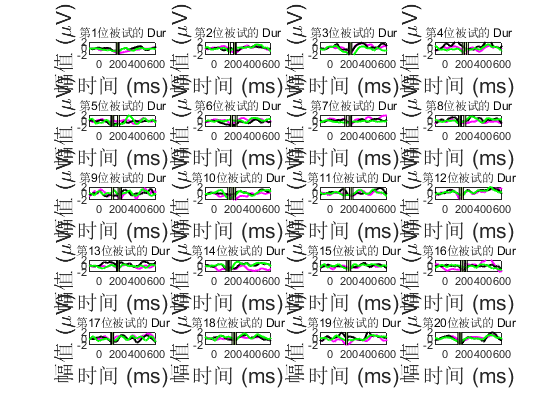

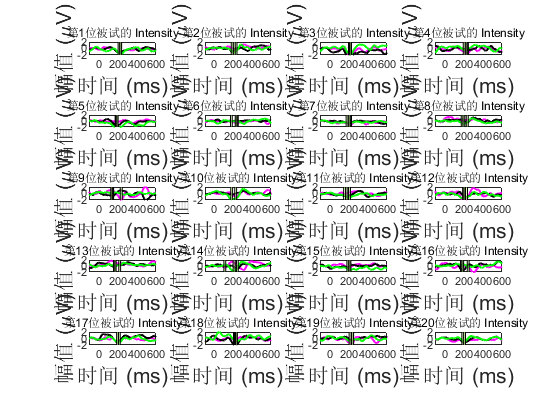

In [4]:
clc
clear
close all
tic
%%
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
Fz=6;
time=linspace(-100,600,350);
% 确保每次迭代的结果一致
results_individual = cell(1, 3);
for isSub =1:20
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    for days=1:3
        Data=load( [Pathname1 filesep filename1{days} filesep 'epoched.mat'] );
        names = fieldnames(Data);
        channel=Data.channel;
        STD(isSub,days,:,:)= squeeze(mean(Data.STD,3));
        STD_fre(isSub,days,:,:)=squeeze(mean(Data.STD_fre,3));
        STD_name(isSub,days,:,:)=squeeze(mean(Data.STD_name,3));
        STD_time(isSub,days,:,:)=squeeze(mean(Data.STD_time,3));
        STD_In(isSub,days,:,:)=squeeze(mean(Data.STD_In,3));
        
        DEV_Fre(isSub,days,:,:) = squeeze(mean(Data.DEV_Fre,3));
        DEV_name(isSub,days,:,:) = squeeze(mean(Data.DEV_name,3));
        DEV_time(isSub,days,:,:)= squeeze(mean(Data.DEV_time,3));
        DEV_In(isSub,days,:,:) = squeeze(mean(Data.DEV_In,3));
        
        Fre_DI(isSub,days,:,:) = DEV_Fre(isSub,days,:,:) - STD_fre(isSub,days,:,:) ;
        Name_DI(isSub,days,:,:) = DEV_name(isSub,days,:,:) - STD_name(isSub,days,:,:) ;
        Time_DI(isSub,days,:,:) = DEV_time(isSub,days,:,:)- STD_time(isSub,days,:,:) ;
        In_DI(isSub,days,:,:) = DEV_In(isSub,days,:,:) - STD_In(isSub,days,:,:) ;
        %% N1
        [pks,peak_locs,w,p] = findpeaks(-squeeze(STD(isSub,days,Fz,90:126)));%选择80-150ms内的数
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(-squeeze(STD(isSub,days,Fz,60:140)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_N1(isSub,days) =peak_locs(max_peak_loc)+60;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_N1(isSub,days) =peak_locs(max_peak_loc)+90;
        end
        peak_time_1=location_in_x_N1(isSub,days)-10;
        peak_time_2=location_in_x_N1(isSub,days)+10;
        %amp_N1(isSub,days)=max(pks);%单个峰值
        amp_N1(isSub,days)=squeeze(mean(STD(isSub,days,Fz, peak_time_1:peak_time_2),4));%周围20个数的均值
        %     location_in_x_N1(isSub,days) = find(-squeeze(STD(days,Cz,:))==max_peak_num);
        peak_time_N1(isSub,days)=time(1,location_in_x_N1(isSub,days));
        %fill([peak_time(1,isSub)-10 peak_time(1,isSub)-10 peak_time(1,isSub)+10  peak_time(1,isSub)+10],[-6 6 6 -6],[0.8,1,0.58])%第一个括号是x轴，第二个是y轴
        %% P2
        [pks,peak_locs,w,p] = findpeaks(squeeze(STD(isSub,days,Fz,111:201)));%P3a为120-300ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(STD(isSub,days,Fz,101:211)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_P2(isSub,days)=peak_locs(max_peak_loc)+101;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_P2(isSub,days)=peak_locs(max_peak_loc)+111;
        end
        %amp_P2(isSub,days)=max(pks);
        amp_P2(isSub,days)=squeeze(mean(STD(isSub,days,Fz,location_in_x_P2(isSub,days)-10:location_in_x_P2(isSub,days)+10),4));
        peak_time_P2(isSub,days)=time(1,location_in_x_P2(isSub,days));
        %% MMN_Name
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Name_DI(isSub,days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Name_DI(isSub,days,Fz,78:206)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Name_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Name_MMN(isSub,days)=   peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Name(isSub,days)=max(pks);
        amp_MMN_Name(isSub,days)=squeeze(mean(Name_DI(isSub,days,Fz,location_in_Name_MMN(isSub,days)-10:location_in_Name_MMN(isSub,days)+10),4));
        % location_in_Name_MMN(isSub,days) = find(squeeze(-Name_DI(days,Cz,:))==max_peak_num);
        peak_time_MMN_Name(isSub,days)=time(1,location_in_Name_MMN(isSub,days));
        %% MMN_Fre
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Fre_DI(isSub,days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Fre_DI(isSub,days,Fz,78:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Fre_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Fre_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Fre(isSub,days)=max(pks);
        amp_MMN_Fre(isSub,days)=squeeze(mean(Fre_DI(isSub,days,Fz,location_in_Fre_MMN(isSub,days)-10:location_in_Fre_MMN(isSub,days)+10),4));
        %amp_MMN_Fre(isSub,days,:)=squeeze(Fre_DI(days,Fz,location_in_Fre_MMN(isSub,days)-5:location_in_Fre_MMN(isSub,days)+5));
        peak_time_MMN_Fre(isSub,days)=time(1,location_in_Fre_MMN(isSub,days));
        %peak_time_MMN_Fre(isSub,days)=location_in_Fre_MMN(isSub,days);
        %% MMN_time
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Time_DI(isSub,days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Time_DI(isSub,days,Fz,88:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Time_MMN(isSub,days)=peak_locs(max_peak_loc)+88;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Time_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Time(isSub,days)=max(pks);
        amp_MMN_Time(isSub,days)=squeeze(mean(Time_DI(isSub,days,Fz,location_in_Time_MMN(isSub,days)-10:location_in_Time_MMN(isSub,days)+10),4));
        %amp_MMN_Time(isSub,days,:)=squeeze(Time_DI(days,Fz,location_in_Time_MMN(isSub,days)-5:location_in_Time_MMN(isSub,days)+5));
        peak_time_MMN_Time(isSub,days)=time(1,location_in_Time_MMN(isSub,days));
        %peak_time_MMN_Time(isSub,days)=location_in_Time_MMN(isSub,days);
        %% MMN_In
        [pks,peak_locs,w,p] = findpeaks(squeeze(-In_DI(isSub,days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-In_DI(isSub,days,Fz,78:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_In_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_In_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_In(isSub,days)= max(pks);
        amp_MMN_In(isSub,days)=squeeze(mean(In_DI(isSub,days,Fz,location_in_In_MMN(isSub,days)-10:location_in_In_MMN(isSub,days)+10),4));
        peak_time_MMN_In(isSub,days)=time(1,location_in_In_MMN(isSub,days));
    end
    time=linspace(-100,600,350);
    a=isSub;
    figure(1)
    subplot(5,4,a)
    STD1=squeeze(STD(isSub,1,Fz,:));
    STD2=squeeze(STD(isSub,2,Fz,:));
    STD3=squeeze(STD(isSub,3,Fz,:));
    STD4=squeeze(mean(STD(isSub,:,Fz,:),2));
    y1=plot(time, STD1,'m','linewidth', 1.5); %% plot the waveforms
    hold on
    y2=plot(time, STD2,'k','linewidth', 1.5);
    hold on
    y3=plot(time, STD3,'g','linewidth', 1.5);
    hold on
    for days=1:3
        h1= fill([peak_time_N1(isSub,days)-10 peak_time_N1(isSub,days)-10 peak_time_N1(isSub,days)+10  peak_time_N1(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.58]);%第一个括号是x轴，第二个是y轴
        set(h1,'FaceAlpha', 0.5); % 设置透明度为0.5
        h2=fill([peak_time_P2(isSub,days)-10 peak_time_P2(isSub,days)-10 peak_time_P2(isSub,days)+10  peak_time_P2(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.7]);%第一个括号是x轴，第二个是y轴
        set(h2,'FaceAlpha', 0.5); % 设置透明度为0.5
        hold on
    end
    %legend([y1 y2 y3],'first','second','third');
    set(gca,'YDir'); %% reverse the direction of Y axis
    axis([-100 600 -2 2]);  %% define the region to displa
    xlabel('时间 (ms)','fontsize',16); %% name of X axi
    ylabel('幅值 (\muV)','fontsize',16);
    title(sprintf("第%d位被试的STD", isSub))
    
    figure(2)
    subplot(5,4,a)
    Fre1=squeeze(Fre_DI(isSub,1,Fz,:));
    Fre2=squeeze(Fre_DI(isSub,2,Fz,:));
    Fre3=squeeze(Fre_DI(isSub,3,Fz,:));
    y1=plot(time, Fre1,'m','linewidth', 1.5); %% plot the waveforms
    hold on
    y2=plot(time, Fre2,'k','linewidth', 1.5);
    hold on
    y3=plot(time, Fre3,'g','linewidth', 1.5);
    hold on
    for days=1:3
        h1= fill([ peak_time_MMN_Fre(isSub,days)-10  peak_time_MMN_Fre(isSub,days)-10  peak_time_MMN_Fre(isSub,days)+10   peak_time_MMN_Fre(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.58]);%第一个括号是x轴，第二个是y轴
        set(h1,'FaceAlpha', 0.5); % 设置透明度为0.5
        hold on
    end
%    legend([y1 y2 y3],'first','second','third')
    set(gca,'YDir'); %% reverse the direction of Y axis
    axis([-100 600 -2 2]);  %% define the region to displa
    xlabel('时间 (ms)','fontsize',16); %% name of X axi
    ylabel('幅值 (\muV)','fontsize',16);
    title(sprintf("第%d位被试Fz的Fre", isSub));
    figure(3)
    subplot(5,4,a)
    Name1=squeeze(Name_DI(isSub,1,Fz,:));
    Name2=squeeze(Name_DI(isSub,2,Fz,:));
    Name3=squeeze(Name_DI(isSub,3,Fz,:));
    y1=plot(time, Name1,'m','linewidth', 1.5); %% plot the waveforms
    hold on
    y2=plot(time, Name2,'k','linewidth', 1.5);
    hold on
    y3=plot(time, Name3,'g','linewidth', 1.5);
    hold on
    for days=1:3
        h1= fill([peak_time_MMN_Name(isSub,days)-10 peak_time_MMN_Name(isSub,days)-10 peak_time_MMN_Name(isSub,days)+10  peak_time_MMN_Name(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.58]);%第一个括号是x轴，第二个是y轴
        set(h1,'FaceAlpha', 0.5); % 设置透明度为0.5
        hold on
    end
   % legend([y1 y2 y3],'first','second','third')
    set(gca,'YDir'); %% reverse the direction of Y axis
    axis([-100 600 -3 3]);  %% define the region to displa
    xlabel('时间 (ms)','fontsize',16); %% name of X axi
    ylabel('幅值 (\muV)','fontsize',16);
    title(sprintf("第%d位被试的Name", isSub));
    
    figure(4)
    subplot(5,4,a)
    Time1=squeeze( Time_DI(isSub,1,Fz,:));
    Time2=squeeze( Time_DI(isSub,2,Fz,:));
    Time3=squeeze( Time_DI(isSub,3,Fz,:));
    y1=plot(time, Time1,'m','linewidth', 1.5); %% plot the waveforms
    hold on
    y2=plot(time, Time2,'k','linewidth', 1.5);
    hold on
    y3=plot(time, Time3,'g','linewidth', 1.5);
    hold on
    for days=1:3
        h1= fill([ peak_time_MMN_Time(isSub,days)-10  peak_time_MMN_Time(isSub,days)-10  peak_time_MMN_Time(isSub,days)+10   peak_time_MMN_Time(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.58]);%第一个括号是x轴，第二个是y轴
        set(h1,'FaceAlpha', 0.5); % 设置透明度为0.5
        hold on
    end
   % legend([y1 y2 y3],'first','second','third')
    set(gca,'YDir'); %% reverse the direction of Y axis
    axis([-100 600 -2 2]);  %% define the region to displa
    xlabel('时间 (ms)','fontsize',16); %% name of X axi
    ylabel('幅值 (\muV)','fontsize',16);
    title(sprintf("第%d位被试的 Dur", isSub));
    
    figure(5)
    subplot(5,4,a)
    In1=squeeze(In_DI(isSub,1,Fz,:));
    In2=squeeze(In_DI(isSub,2,Fz,:));
    In3=squeeze(In_DI(isSub,3,Fz,:));
    y1=plot(time, In1,'m','linewidth', 1.5); %% plot the waveforms
    hold on
    y2=plot(time, In2,'k','linewidth', 1.5);
    hold on
    y3=plot(time, In3,'g','linewidth', 1.5);
    hold on
    for days=1:3
        h1= fill([peak_time_MMN_In(isSub,days)-10 peak_time_MMN_In(isSub,days)-10 peak_time_MMN_In(isSub,days)+10 peak_time_MMN_In(isSub,days)+10],[-3 3 3 -3],[0.8,1,0.58]);%第一个括号是x轴，第二个是y轴
        set(h1,'FaceAlpha', 0.5); % 设置透明度为0.5
        hold on
    end
    %legend([y1 y2 y3],'first','second','third')
    set(gca,'YDir'); %% reverse the direction of Y axis
    axis([-100 600 -2 2]);  %% define the region to displa
    xlabel('时间 (ms)','fontsize',16); %% name of X axi
    ylabel('幅值 (\muV)','fontsize',16);
    title(sprintf("第%d位被试的 Intensity", isSub));
end
